# Stock Price Analysis Model

In [282]:
#Overview: This model analyzes stock performance over the past 5 years of three tech companies:
#Tesla (TSLA), Nvidia (NVDA) and Apple (AAPL)

#Purpose: To provide insight to an investor so they can determine if these companies are a good investment depending
#on how much risk that investor is willing to take on. 

In [283]:
import yfinance as yf
import json
import pandas as pd

# Stock Data Collection

In [284]:
#pull qualitative company stock data from yahoo finance database using yf.ticker function
tesla_yf = yf.Ticker("TSLA")

#pulls last five years of data
tsla = tesla.history(period = "5y")

In [285]:
nvidia_yf = yf.Ticker("NVDA")
nvda = nvidia.history(period = "5y")

In [286]:
apple_yf = yf.Ticker("AAPL")
aapl = apple.history(period = "5y")

# Company Summaries

In [287]:
#the following data is pulled from the yahoo finance database using the yf.info function
#I create a JSON file using this data, then I create a JSON object and print only the current stock price
#and business summary from the JSON file for each company

In [288]:
tslaInfo = tesla_yf.info
tslaJson = json.dumps(tslaInfo)
readJson1 = json.loads(tslaJson)
print("Tesla Current Stock Price:")
readJson1["currentPrice"]

Tesla Current Stock Price:


1084.6

In [289]:
print("Tesla Business Summary: ")
readJson1["longBusinessSummary"]

Tesla Business Summary: 


'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and purchase financing and leasing services. This segment is also involved in the provision of non-warranty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, as well as sale of products through its subsidiaries to third party customers; services for electric vehicles through its company-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties and extended service plans. The Energy Generation and Storage segment engag

In [290]:
nvdaInfo = nvidia_yf.info
nvdaJson = json.dumps(nvdaInfo)
readJson2 = json.loads(nvdaJson)
print("Nvidia Current Stock Price:")
readJson2["currentPrice"]

Nvidia Current Stock Price:


321.26

In [291]:
print("Nvidia Business Summary: ")
readJson2["longBusinessSummary"]

Nvidia Business Summary: 


"NVIDIA Corporation operates as a visual computing company worldwide. It operates in two segments, Graphics and Compute & Networking. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise design; GRID software for cloud-based visual and virtual computing; and automotive platforms for infotainment systems. The Compute & Networking segment offers Data Center platforms and systems for AI, HPC, and accelerated computing; Mellanox networking and interconnect solutions; automotive AI Cockpit, autonomous driving development agreements, and autonomous vehicle solutions; and Jetson for robotics and other embedded platforms. The company's products are used in gaming, professional visualization, datacenter, and automotive markets. NVIDIA Corporation sells its products to original equipment manufacturers, original device manufacturers, system builders,

In [292]:
aaplInfo = apple_yf.info
aaplJson = json.dumps(aaplInfo)
readJson3 = json.loads(aaplJson)
print("Apple Current Stock Price:")
readJson3["currentPrice"]

Apple Current Stock Price:


163.76

In [293]:
print("Apple Business Summary:")
readJson3["longBusinessSummary"]

Apple Business Summary:


'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, wh

# Dividend and Stock Split Information

In [294]:
#Displays dividend and stock split information on all three companies
teslaAct = tesla.actions

nvidiaAct = nvidia.actions

appleAct = apple.actions

#combines dividend and stock split info from all three companies
df = [teslaAct, nvidiaAct, appleAct]
actions = pd.concat(df, keys = ["Tesla", "Nvidia", "Apple"])

#export dividend and stock split data to csv file
actions.to_csv("DivAndStockSplitInfo.csv")

# Dividend Growth

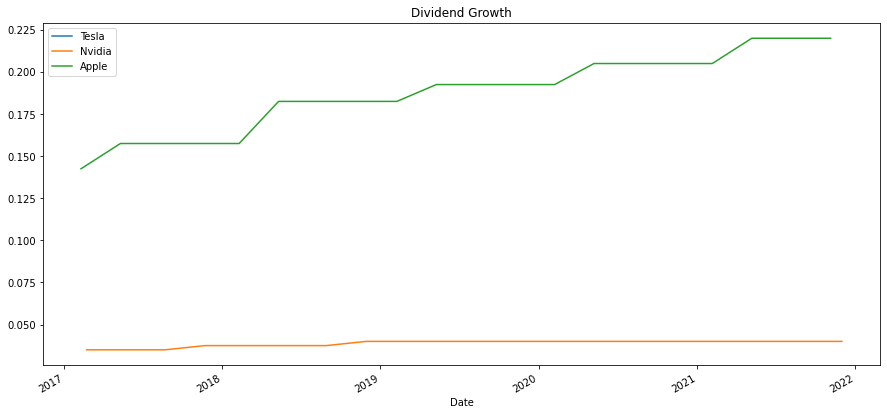

In [295]:
#Dividend Growth of each stock 
#Tesla does not pay a dividend hence why the plot doesn't show any dividend data for Tesla

tesla.dividends.plot(label = "Tesla", figsize = (15,7))

nvidia.dividends.plot(label = "Nvidia")

apple.dividends.plot(label = "Apple")

plt.title("Dividend Growth")
plt.legend()

# Investment Firm Recommendations (buy/sell/hold)

In [296]:
teslaRec = tesla.recommendations.tail(10)
nvidiaRec = nvidia.recommendations.tail(10)
appleRec = apple.recommendations.tail(10)

recDF = [teslaRec, nvidiaRec, appleRec]
recs = pd.concat(recDF, keys = ["Tesla", "Nvidia", "Apple"])

#exports buy/sell/hold recommendations to a separate csv file
recs.to_csv("FirmRecs.csv")

# Stock Price Movement

In [297]:
import matplotlib.pyplot as plt
%matplotlib inline

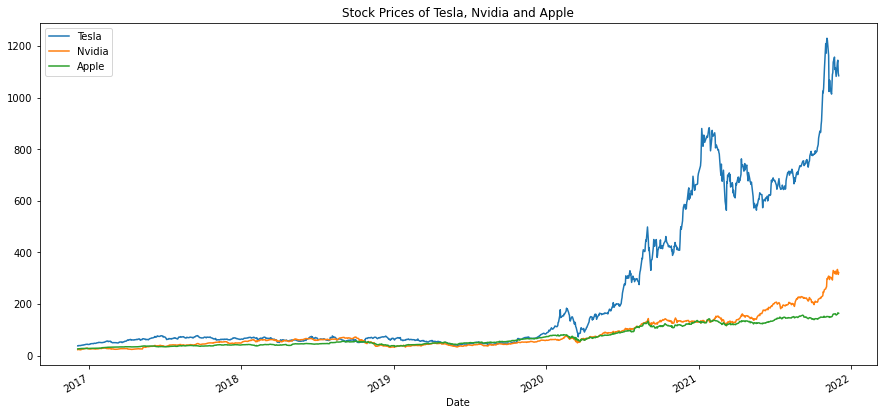

In [298]:
#stock price using daily "Close" price over past five years
tesla_df["Close"].plot(label = "Tesla", figsize = (15,7))
nvidia_df["Close"].plot(label = "Nvidia")
apple_df["Close"].plot(label = "Apple")

plt.title("Stock Prices of Tesla, Nvidia and Apple")
plt.legend()

# Interactive OHLC Chart

In [299]:
import plotly.graph_objects as go

In [300]:
#Open, High, Low, Close (OHLC) Chart 

#investor can set stock equal to any of the three stock tickers to see OHLC Chart
stock = tsla

chart = go.Figure(data = go.Ohlc(x = stock.index, open = stock["Open"], high = stock["High"], low = stock["Low"], close = stock["Close"]))
chart.show()

# Stock Trade Volume Chart

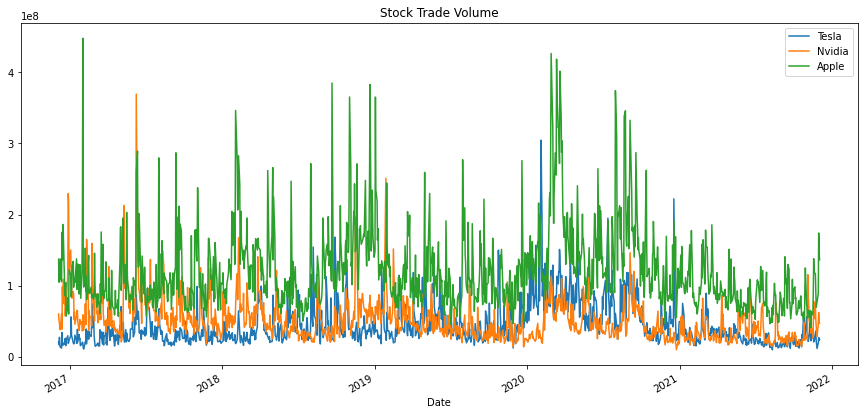

In [301]:
#volume of stock traded over past 5 years
tsla["Volume"].plot(label = "Tesla", figsize = (15,7))
nvda["Volume"].plot(label = "Nvidia")
aapl["Volume"].plot(label = "Apple")

plt.title("Stock Trade Volume")
plt.legend()

# Market Capitalization Chart

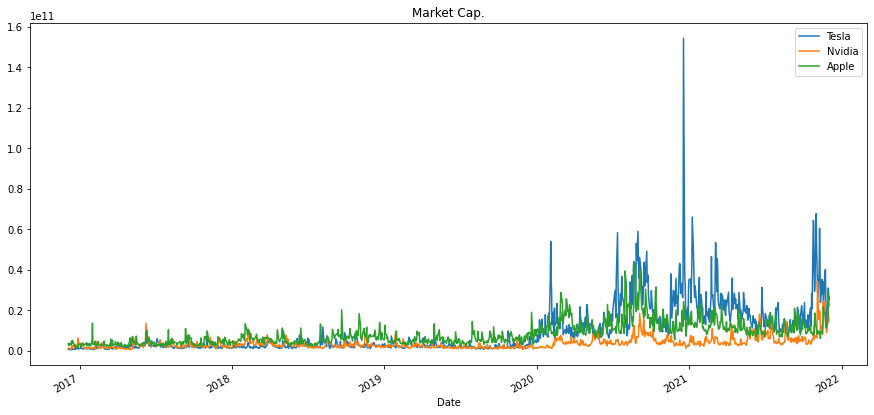

In [302]:
#Market capitalization of each company over the past 5 years
tsla["MarketCap"] = tsla["Close"] * tsla["Volume"]
nvda["MarketCap"] = nvda["Close"] * nvda["Volume"]
aapl["MarketCap"] = aapl["Close"] * aapl["Volume"]

tsla["MarketCap"].plot(label = "Tesla", figsize = (15,7))
nvda["MarketCap"].plot(label = "Nvidia")
aapl["MarketCap"].plot(label = "Apple")

plt.title("Market Cap.")
plt.legend()

# Moving Average Charts

In [303]:
#20 day (short term) and 200 day (long term) moving average (MA) on closing prices
#investor can set stock equal to any of the three stock tickers to see respective moving average chart

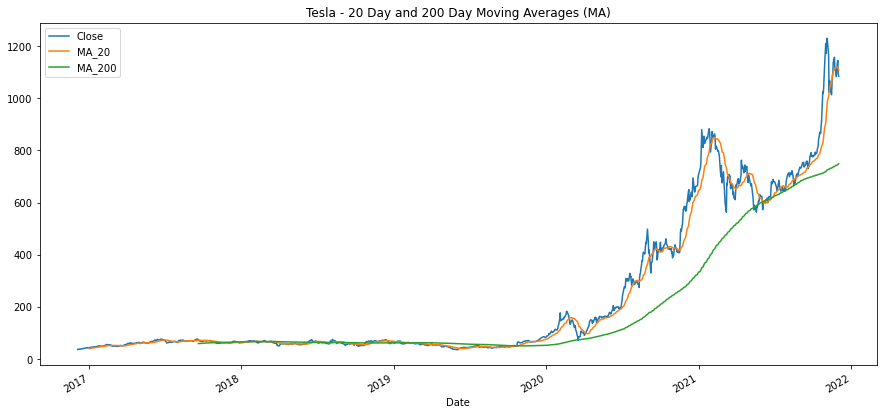

In [304]:
#Tesla Moving Averages: 
tsla["Close"].plot(figsize = (15,7))
tsla.loc[:, "MA_20"] = tsla.Close.rolling(20).mean()
tsla["MA_20"].plot()

tsla.loc[:, "MA_200"] = tsla.Close.rolling(200).mean()
tsla["MA_200"].plot()

plt.title("Tesla - 20 Day and 200 Day Moving Averages (MA)")
plt.legend()

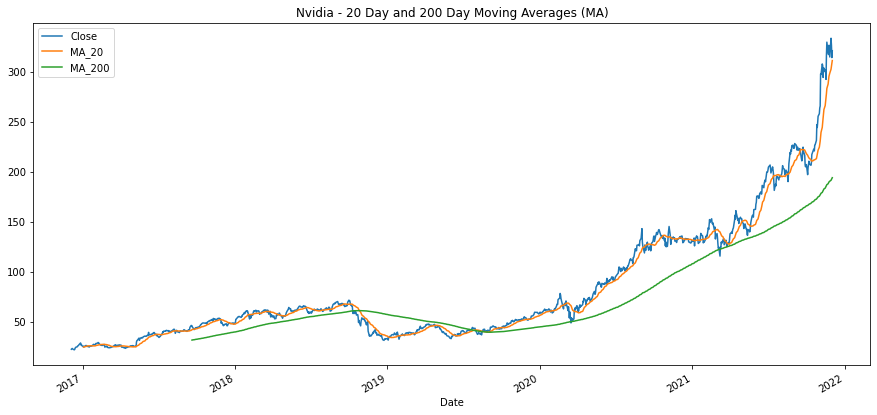

In [305]:
#Nvidia Moving Averages: 
nvda["Close"].plot(figsize = (15,7))
nvda.loc[:, "MA_20"] = nvda.Close.rolling(20).mean()
nvda["MA_20"].plot()

nvda.loc[:, "MA_200"] = nvda.Close.rolling(200).mean()
nvda["MA_200"].plot()

plt.title("Nvidia - 20 Day and 200 Day Moving Averages (MA)")
plt.legend()

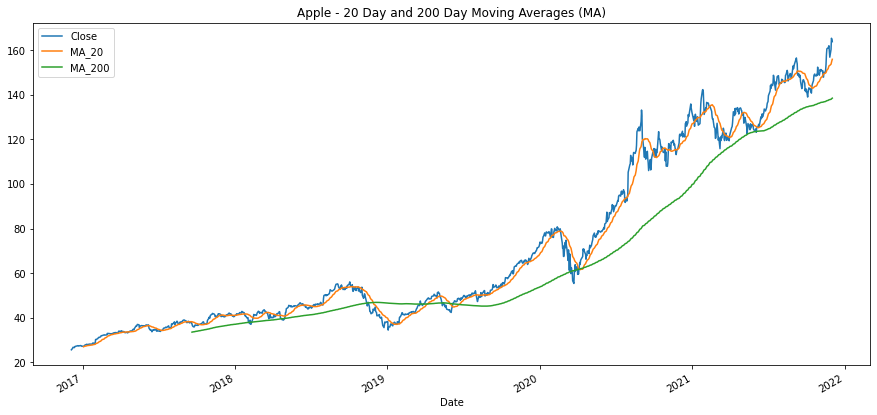

In [306]:
#Apple Moving Averages: 
aapl["Close"].plot(figsize = (15,7))
aapl.loc[:, "MA_20"] = aapl.Close.rolling(20).mean()
aapl["MA_20"].plot()

aapl.loc[:, "MA_200"] = aapl.Close.rolling(200).mean()
aapl["MA_200"].plot()

plt.title("Apple - 20 Day and 200 Day Moving Averages (MA)")
plt.legend()

# Scatter Matrix

In [307]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Tesla (CLosing Prices)', ylabel='Tesla (CLosing Prices)'>,
        <AxesSubplot:xlabel='Nvidia (Closing Prices)', ylabel='Tesla (CLosing Prices)'>,
        <AxesSubplot:xlabel='Apple (Closing Prices)', ylabel='Tesla (CLosing Prices)'>],
       [<AxesSubplot:xlabel='Tesla (CLosing Prices)', ylabel='Nvidia (Closing Prices)'>,
        <AxesSubplot:xlabel='Nvidia (Closing Prices)', ylabel='Nvidia (Closing Prices)'>,
        <AxesSubplot:xlabel='Apple (Closing Prices)', ylabel='Nvidia (Closing Prices)'>],
       [<AxesSubplot:xlabel='Tesla (CLosing Prices)', ylabel='Apple (Closing Prices)'>,
        <AxesSubplot:xlabel='Nvidia (Closing Prices)', ylabel='Apple (Closing Prices)'>,
        <AxesSubplot:xlabel='Apple (Closing Prices)', ylabel='Apple (Closing Prices)'>]],
      dtype=object)

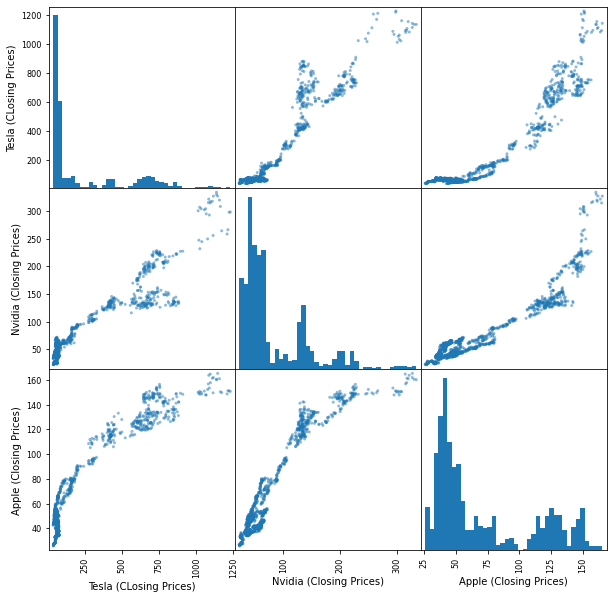

In [308]:
#scatter matrix
scatMat = pd.concat([tsla["Close"], nvda["Close"], aapl["Close"]], axis = 1)
scatMat.columns = ["Tesla (CLosing Prices)", "Nvidia (Closing Prices)", "Apple (Closing Prices)"]
scatter_matrix(scatMat, figsize = (10,10), hist_kwds={"bins":40})

# Stock Volatility

In [309]:
#daily percent change in stock price
#formula used: daily percent change = [p(t) / p(t-1)] - 1
tsla["Daily % Change"] = (tsla["Close"]/tsla["Close"].shift(1)) - 1
nvda["Daily % Change"] = (nvda["Close"]/nvda["Close"].shift(1)) - 1
aapl["Daily % Change"] = (aapl["Close"]/aapl["Close"].shift(1)) - 1

Text(0.5, 1.0, 'Stock Volatility')

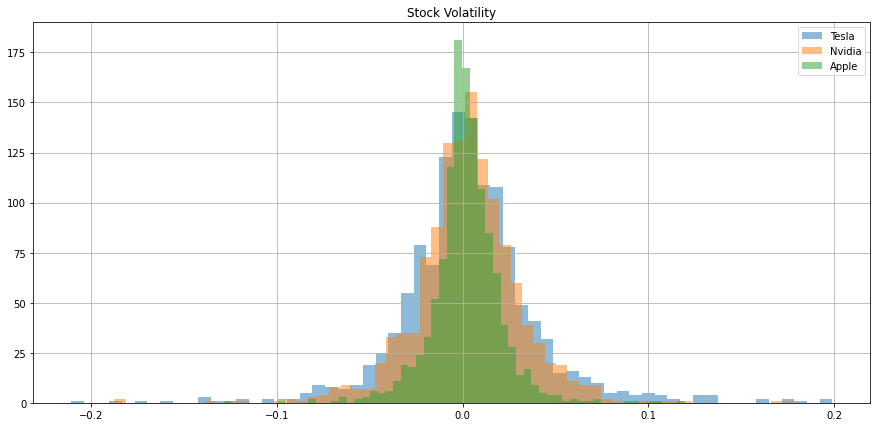

In [310]:
#Volatility
#use daily percent change figures to plot volatility of each stock over the past five years
#more width in the bell curve = higher variation = higher volatility in stock price
tsla["Daily % Change"].hist(bins = 60, label = "Tesla", alpha = 0.5, figsize = (15,7))
nvda["Daily % Change"].hist(bins = 60, label = "Nvidia",alpha = 0.5)
aapl["Daily % Change"].hist(bins = 60, label = "Apple",alpha = 0.5)

plt.legend()
plt.title("Stock Volatility")

# Cumulative Returns

In [311]:
#cumulative returns: which stock shows the highest return over time from a $1 investment?
#chart shows how a $1 investment grew over the past five years for each stock

In [312]:
#Cumulative Return
#formula used: i(t) = (1+r(t)) * i(t-1)
tsla["Cumulative Return"] = (1 + tsla["Daily % Change"]).cumprod()
nvda["Cumulative Return"] = (1 + nvda["Daily % Change"]).cumprod()
aapl["Cumulative Return"] = (1 + aapl["Daily % Change"]).cumprod()

Text(0.5, 1.0, 'Daily Cumulative Returns')

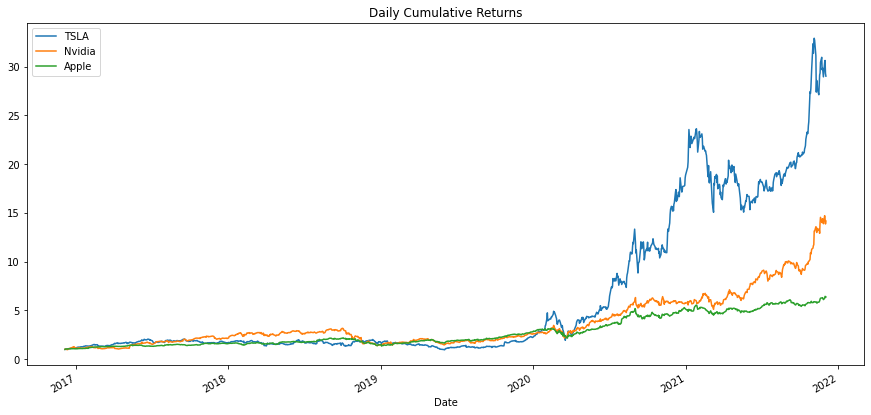

In [313]:
tsla["Cumulative Return"].plot(label = "TSLA", figsize = (15,7))
nvda["Cumulative Return"].plot(label = "Nvidia")
aapl["Cumulative Return"].plot(label = "Apple")

plt.legend()
plt.title("Daily Cumulative Returns")

In [314]:
tslaEx = yf.Ticker("TSLA")
tslaEx1 = tesla.history(period = "5y")
tslaEx1

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2016-12-05,36.501999,37.778000,36.501999,37.360001,20361000,0,0.0
2016-12-06,37.104000,37.316002,36.535999,37.169998,16958000,0,0.0
2016-12-07,37.230000,38.680000,37.000000,38.630001,27309500,0,0.0
2016-12-08,38.410000,38.500000,37.908001,38.458000,15970500,0,0.0
2016-12-09,38.174000,38.768002,38.161999,38.436001,13612500,0,0.0
...,...,...,...,...,...,...,...
2021-11-26,1099.469971,1108.780029,1081.000000,1081.920044,11680900,0,0.0
2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,19464500,0,0.0
2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,27092000,0,0.0


# Updated Stock Information

In [315]:
#dropped the "Dividends" and "Stock Splits" columns from the stock dataframes since I created a separate csv file for that data
newTSLA = tsla.drop(['Dividends', 'Stock Splits'], axis=1)
newNVDA = nvda.drop(['Dividends', 'Stock Splits'], axis=1)
newAAPL = aapl.drop(['Dividends', 'Stock Splits'], axis=1)
newAAPL.tail(10)

,Open,High,Low,Close,Volume,MarketCap,MA_20,MA_200,Daily % Change,Cumulative Return
Date,,,,,,,,,,
2021-11-18,153.710007,158.669998,153.050003,157.869995,137827700,2.175886e+10,150.389254,137.197441,0.028536,6.148587
2021-11-19,157.649994,161.020004,156.529999,160.550003,117305600,1.883341e+10,150.993089,137.319566,0.016976,6.252966
2021-11-22,161.679993,165.699997,161.000000,161.020004,117467900,1.891468e+10,151.622919,137.443293,0.002927,6.271271
2021-11-23,161.119995,161.800003,159.059998,161.410004,96041900,1.550212e+10,152.238300,137.573450,0.002422,6.286461
2021-11-24,160.750000,162.139999,159.639999,161.940002,69463600,1.124894e+10,152.903645,137.709342,0.003284,6.307103
2021-11-26,159.570007,160.449997,156.360001,156.809998,76959800,1.206807e+10,153.126762,137.820879,-0.031678,6.107303
2021-11-29,159.369995,161.190002,158.789993,160.240005,88748200,1.422101e+10,153.659678,137.948370,0.021874,6.240893
2021-11-30,159.990005,165.520004,159.919998,165.300003,174048100,2.877015e+10,154.487532,138.112012,0.031578,6.437965
2021-12-01,167.479996,170.300003,164.529999,164.770004,152052500,2.505369e+10,155.235963,138.284699,-0.003206,6.417323


In [316]:
#the following stock info is written in a csv file for each stock for the investor to reference:
#Open, High, Low, Close, Volume, MarketCap, MA_20, MA_200, Daily % Change, Cumulative Return
newTSLA.to_csv("TeslaData.csv")
newNVDA.to_csv("NvidiaData.csv")
newAAPL.to_csv("AppleData.csv")